# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

html = browser.html

### Step 2: Scrape the Table

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')

# Extract the headers
headers = [header.text.strip() for header in rows[0].find_all('th')]

### Step 3: Store the Data

In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    columns = row.find_all('td')
    row_data = [col.text.strip() for col in columns]
    data.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(data, columns=headers)

In [8]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

In [9]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_weather_df['id'] = mars_weather_df['id'].astype(int)
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

In [12]:
# 1. How many months are there on Mars?
mars_months = mars_weather_df['month'].nunique()
mars_months

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
mars_sols = mars_weather_df['sol'].nunique()
mars_sols

1867

#### Minimum Temperature

In [14]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

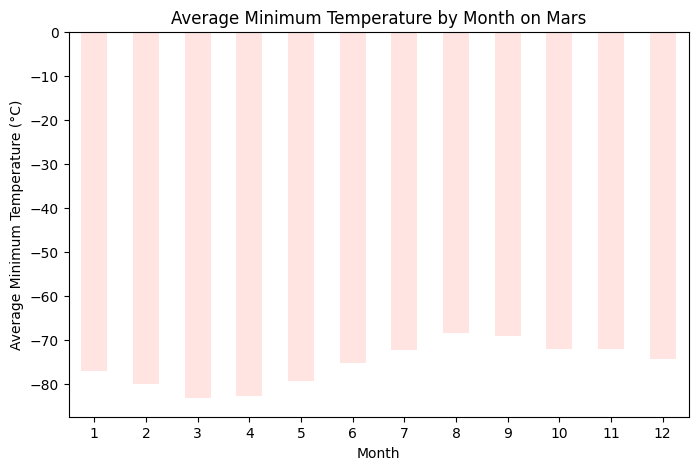

In [31]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', figsize=(8, 5), color='mistyrose')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp = avg_min_temp.sort_values()

# Identify the coldest and hottest months
coldest_month = sorted_avg_min_temp.idxmin()
hottest_month = sorted_avg_min_temp.idxmax()

coldest_month
hottest_month

8

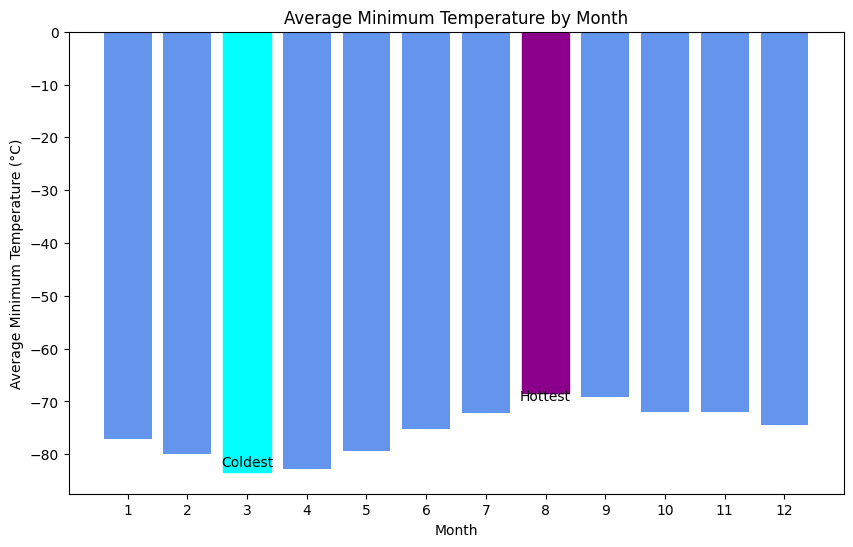

In [27]:
# Plot the sorted average minimum temperature by month
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_avg_min_temp.index, sorted_avg_min_temp.values, color='cornflowerblue')

# Highlight the coldest month
bars[0].set_color('cyan')
plt.text(sorted_avg_min_temp.index[0], sorted_avg_min_temp.iloc[0] + 1, 'Coldest', color='black', ha='center')

# Highlight the hottest month
bars[-1].set_color('darkmagenta')
plt.text(sorted_avg_min_temp.index[-1], sorted_avg_min_temp.iloc[-1] - 1.5, 'Hottest', color='black', ha='center')

# Add titles and labels
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(range(1, 13), rotation=0)
plt.show()

#### Atmospheric Pressure

In [18]:
# 4. What is the average pressure by month?
avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

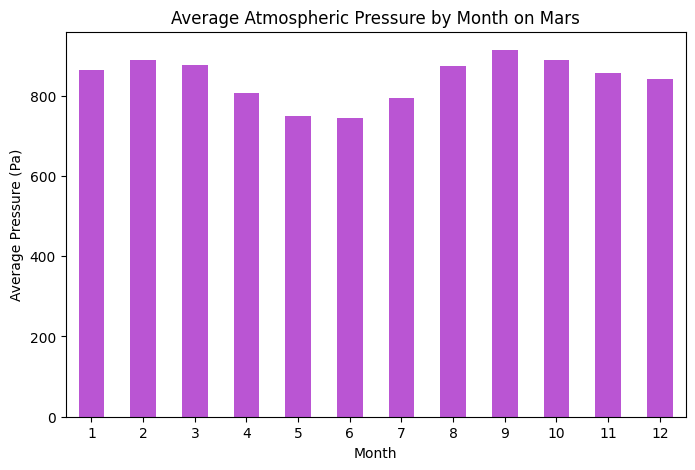

In [28]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', figsize=(8, 5), color='mediumorchid')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)
plt.show()

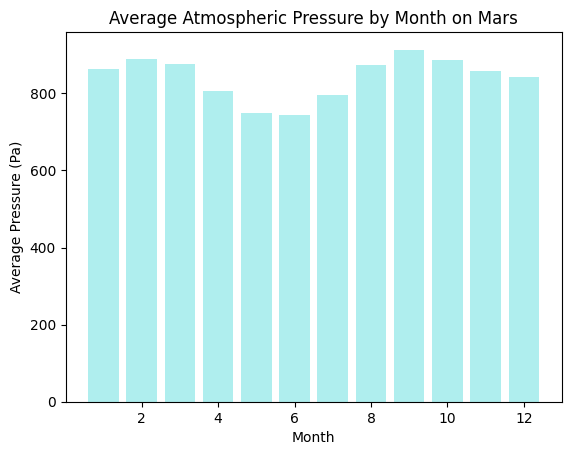

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

In [29]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure.sort_values()

# Plot the average pressure for all months as a bar graph
plt.bar(sorted_avg_pressure.index, sorted_avg_pressure.values, color='paleturquoise')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)
plt.show()

sorted_avg_pressure

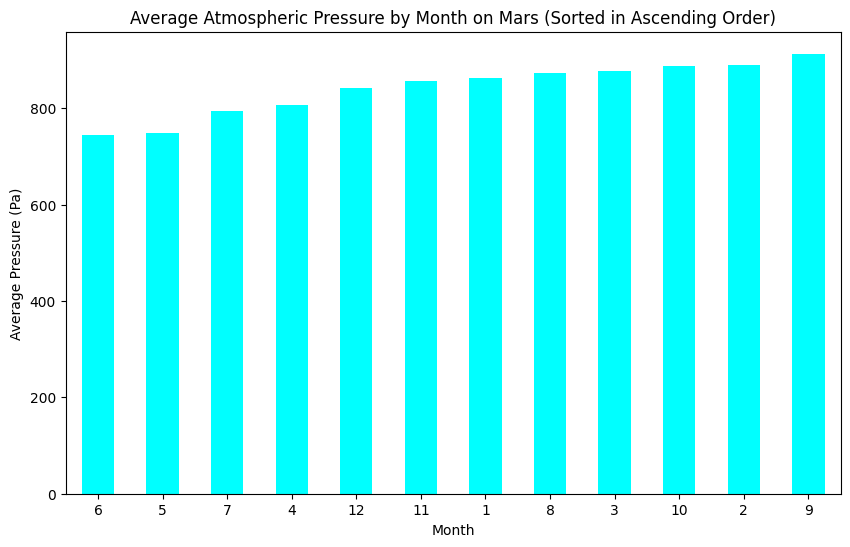

In [21]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure.sort_values()

# Plot the sorted average pressure values as a bar chart
sorted_avg_pressure.plot(kind='bar', figsize=(10, 6), color='aqua')
plt.title('Average Atmospheric Pressure by Month on Mars (Sorted in Ascending Order)')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)
plt.show()

#### Year Length

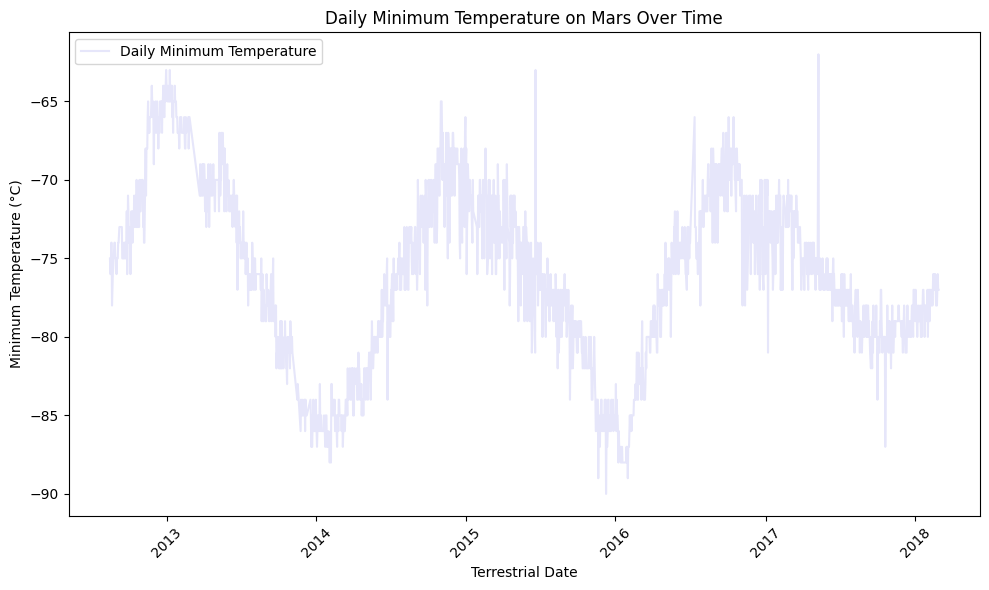

In [38]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10, 6))  
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'], label='Daily Minimum Temperature', color='lavender')  
plt.title('Daily Minimum Temperature on Mars Over Time')  
plt.xlabel('Terrestrial Date')  
plt.ylabel('Minimum Temperature (°C)')  
plt.legend() 
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

### Step 6: Save the Data

In [23]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

In [24]:
browser.quit()